## Normalized cost of hydrogen at the export locations

### load necessary files

In [22]:
%run -i ../functions/load_packages.ipynb


### 1. Extract normalized cost in optimistic scenario

In [31]:
li=[]
metrics_opt30 = "../../sandbox-cs/pypsa-earth-sec/results/MT_opt30/csvs/metrics.csv"
df = pd.read_csv(metrics_opt30, keep_default_na=False,
        na_values=[""])
df=df.set_index('cluster')
df = df.loc[['export', 'total costs']]
df = df.apply(pd.to_numeric)

dfc = [0]
for column in df.columns[1:]:
    dfc.append((df.loc["total costs",column].astype(float)- df.loc["total costs", "30"].astype(float)) / (df.loc["export", column] * (1e+09/33.33)))
dfc = pd.DataFrame(dfc).transpose()
dfc.columns = ['30', '30.1', '30.2', '30.3', '30.4', '30.5']
dfopt = pd.concat([df, dfc], axis=0)
dfopt

,30,30.1,30.2,30.3,30.4,30.5
export,0.000000e+00,1.000000e+00,1.000000e+01,5.000000e+01,2.000000e+02,5.380000e+02
total costs,2.774852e+09,2.817423e+09,3.302075e+09,5.637609e+09,2.832289e+10,1.344802e+11
0,0.000000e+00,1.418884e+00,1.757235e+00,1.908314e+00,4.257580e+00,8.159369e+00


### 2. Extract normalized cost in realistic scenario

In [32]:
metrics_real30 = "../../sandbox-cs/pypsa-earth-sec/results/MT_real30/csvs/metrics.csv"
df = pd.read_csv(metrics_real30, keep_default_na=False,
        na_values=[""])
df=df.set_index('cluster')
df = df.loc[['export', 'total costs']]
df = df.apply(pd.to_numeric)

dfc = [0]
for column in df.columns[1:]:
    dfc.append((df.loc["total costs",column].astype(float)- df.loc["total costs", "30"].astype(float)) / (df.loc["export", column] * (1e+09/33.33)))
dfc = pd.DataFrame(dfc).transpose()
dfc.columns = ['30', '30.1', '30.2', '30.3', '30.4', '30.5']
dfreal = pd.concat([df, dfc], axis=0)
dfreal

,30,30.1,30.2,30.3,30.4,30.5
export,0.000000e+00,1.000000e+00,1.000000e+01,5.000000e+01,2.000000e+02,5.380000e+02
total costs,2.915544e+09,2.957299e+09,3.475057e+09,5.929793e+09,4.212404e+10,1.488847e+11
0,0.000000e+00,1.391700e+00,1.864858e+00,2.009298e+00,6.534096e+00,9.043035e+00


### 3. Extract normalized cost in conservative scenario

In [33]:
metrics_con30 = "../../sandbox-cs/pypsa-earth-sec/results/MT_con30/csvs/metrics.csv"
df = pd.read_csv(metrics_con30, keep_default_na=False,
        na_values=[""])
df=df.set_index('cluster')
df = df.loc[['export', 'total costs']]
df = df.apply(pd.to_numeric)

dfc = [0]
for column in df.columns[1:]:
    dfc.append((df.loc["total costs",column].astype(float)- df.loc["total costs", "30"].astype(float)) / (df.loc["export", column] * (1e+09/33.33)))
dfc = pd.DataFrame(dfc).transpose()
dfc.columns = ['30', '30.1', '30.2', '30.3', '30.4', '30.5']
dfcon = pd.concat([df, dfc], axis=0)
dfcon

,30,30.1,30.2,30.3,30.4,30.5
export,0.000000e+00,1.000000e+00,1.000000e+01,5.000000e+01,2.000000e+02,5.380000e+02
total costs,2.972395e+09,3.015031e+09,3.542391e+09,6.042261e+09,4.272377e+10,1.507708e+11
0,0.000000e+00,1.421084e+00,1.899797e+00,2.046373e+00,6.624567e+00,9.156358e+00


(1.0, 10.0)

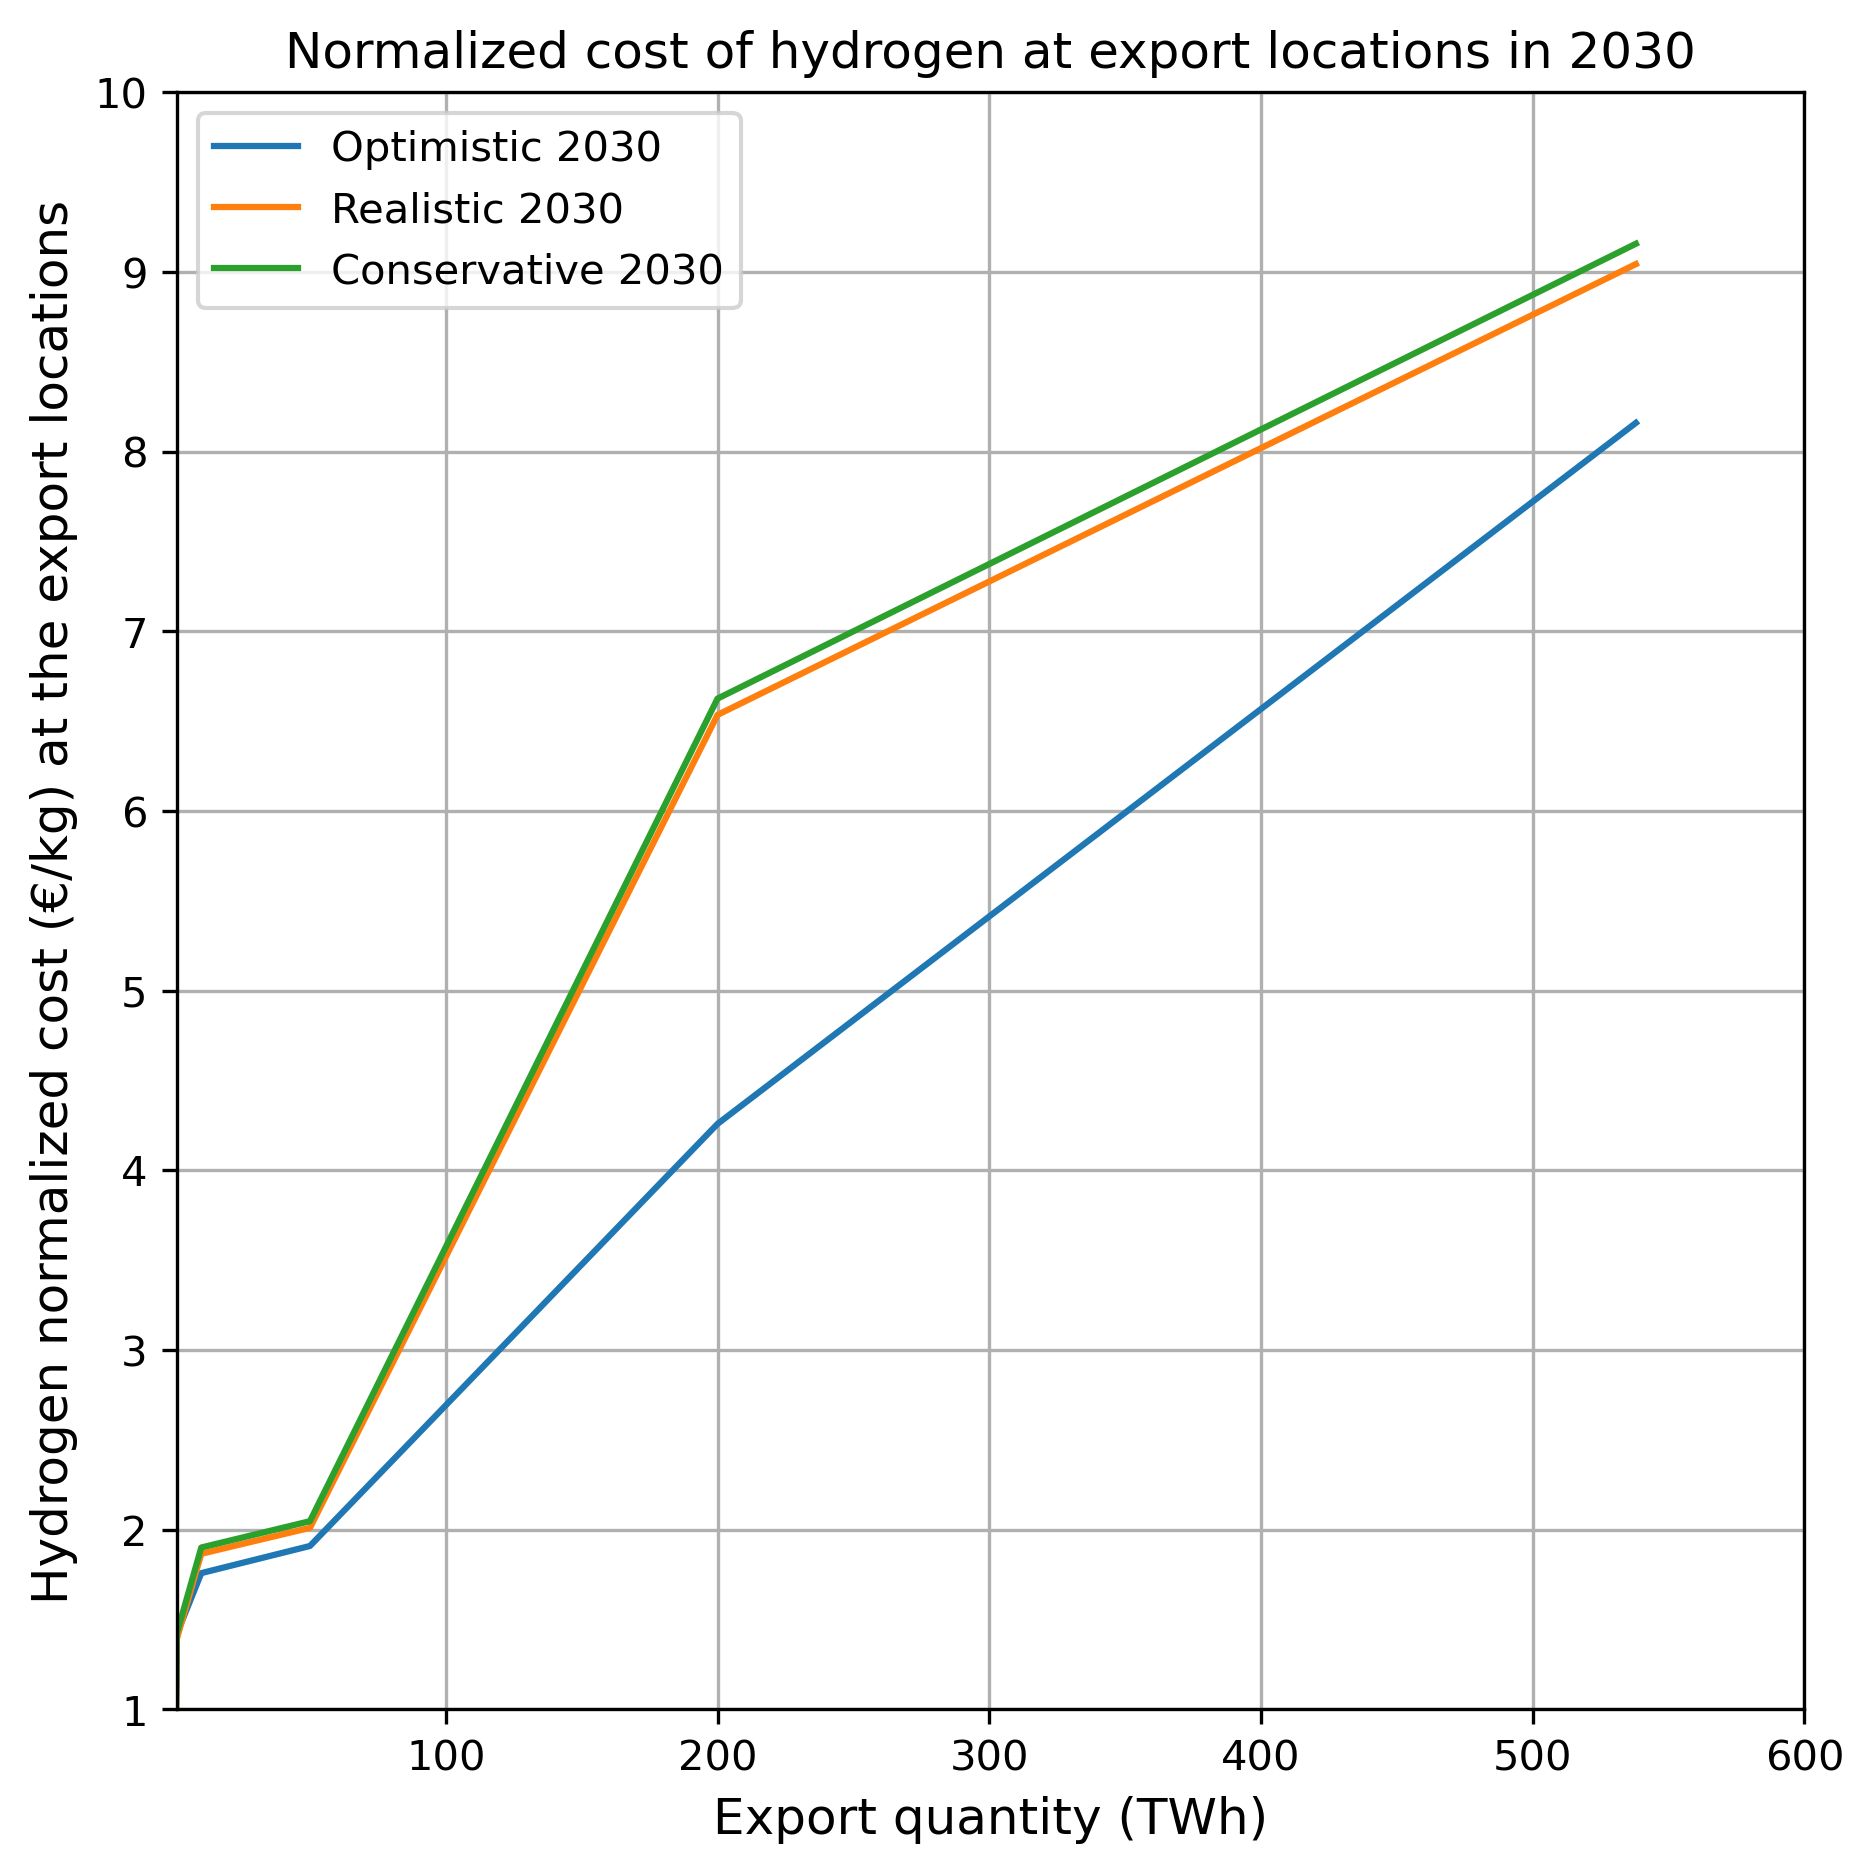

In [35]:
# create figure and axis
fig, ax = plt.subplots(figsize=(7, 7), dpi=300)

#plot optimistic
dfopt.T.plot(ax=ax, x='export', y=0, title= "Normalized cost of hydrogen at export locations in 2030", legend="Optimistic 2030")

#plot realistic
dfreal.T.plot(ax=ax, x='export', y=0, grid=True)

#plot realistic
dfcon.T.plot(ax=ax, x='export', y=0, grid=True)

ax.legend(["Optimistic 2030", "Realistic 2030", "Conservative 2030"]);
#ax.legend(["Realistic 2030", "Conservative 2030"]);
ax.set_ylabel('Hydrogen normalized cost (€/kg) at the export locations',fontsize=12)
ax.set_xlabel('Export quantity (TWh)',fontsize=12)
ax.set_xlim(1,600)
ax.set_ylim(1,10)

In [ ]:
def calculate_spec_prod_costs(n):
    '''Takes a solved sector-coupled PyPSA network and outputs specific productio costs for one kg hydrogen at export nodes'''
    h2_prod_ex = n.links_t['p0'].filter(like='H2 export') #Amounts of H2 produced and provided for export
    h2_prod_ex.columns = h2_prod_ex.columns.str.strip(' export') #Modify column names to match with MP dataframe
    marginal_prices = n.buses_t.marginal_price.loc[:, h2_prod_ex.columns] #Marginal H2 prices at export nodes
    prod_costs = (h2_prod_ex * marginal_prices).sum(axis=0) #Product of production ampunts and prices yields total production costs for each export node
    spec_prod_costs = prod_costs / h2_prod_ex.sum(axis=0) # Division by total nodal production amount yields specific production costs of hydrogen for each export node
    spec_prod_costs = spec_prod_costs * 33.3 / 1000 #Calculate costs per kg assuming 1 kg H2 equals 33.3 KWh
    return spec_prod_costs


Link
NAM12_AC H2    2.729014
NAM20_AC H2    2.799531
dtype: float64

In [ ]:
n_con30 = pypsa.Network("../../pypsa-earth-sec/results/MT_opt30/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.076_DF_200export.nc")
n_real30 = pypsa.Network("../../pypsa-earth-sec/results/MT_opt30/postnetworks/elec_s_30_ec_lc1.0_Co2L_3H_2030_0.076_DF_200export.nc")

NameError: name 'pypsa' is not defined

In [ ]:
costs = calculate_spec_prod_costs(n_con30)
costs

NameError: name 'calculate_spec_prod_costs' is not defined